## Objectives

- Broadly speaking, there are 2 main motivations for carrying out data analyis or visualization
    - **For understanding**: Using visualization techniques to understand the data for the purpose of further analysis/ modelling
    - **For presentation**: Conveying findings from data to a broader audience (e.g. for policy making/ reporting/ business decisions)
    
- This exercise will focus on the former, with the aim of improving the machine learning pipeline in part 3 of the assessment.
- With that aim in mind, this EDA will be structured as follows:
     1. **Setup**: Load required modules and import data (using script created in part 1 of the assessment)
     2. **Glance**: Take a quick look at the raw data and take note of things that should be done in step 3.
     3. **Clean**: Deal with missing, anomalous, or "wrong" values observed in step 2
     4. **Augment**: Take a closer look at the training set and create features that may help the model learn from the data
 
- Although steps 3-4 here are done on the training set (to avoid overfitting), in the pipeline they will be applied to the full dataset.

## 1. Setup

In [127]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import pandas as pd
import mlp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
## options etc.

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 120

In [130]:
raw_df = mlp.setup.extract()

## 2. Glance

#### Check missing values

In [131]:
raw_df.isna().sum()

date                      0
hr                        0
weather                   0
temperature               0
feels_like_temperature    0
relative_humidity         0
windspeed                 0
psi                       0
guest_scooter             0
registered_scooter        0
dtype: int64

Observations:
- No missing values in this dataset. 

#### Look at first and last entries, as well as other summary statistics

In [132]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18643 entries, 0 to 18642
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    18643 non-null  object 
 1   hr                      18643 non-null  int64  
 2   weather                 18643 non-null  object 
 3   temperature             18643 non-null  float64
 4   feels_like_temperature  18643 non-null  float64
 5   relative_humidity       18643 non-null  float64
 6   windspeed               18643 non-null  float64
 7   psi                     18643 non-null  int64  
 8   guest_scooter           18643 non-null  int64  
 9   registered_scooter      18643 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.4+ MB


In [133]:
raw_df.head()

date  hr weather  temperature  feels_like_temperature  \
0  2011-01-01   0   clear         66.7                    95.0   
1  2011-01-01   1   clear         65.0                    93.2   
2  2011-01-01   2    lear         65.0                    93.2   
3  2011-01-01   3   clear         66.7                    95.0   
4  2011-01-01   3   clear         66.7                    95.0   

   relative_humidity  windspeed  psi  guest_scooter  registered_scooter  
0               81.0        0.0   50              7                  90  
1               80.0        0.0    6             23                 224  
2               80.0        0.0   25             14                 188  
3               75.0        0.0   41              9                  70  
4               75.0        0.0   41              9                  70

In [134]:
raw_df.tail()

date  hr weather  temperature  feels_like_temperature  \
18638  2012-12-31  21   clear         68.4                    91.4   
18639  2012-12-31  21   clear         68.4                    91.4   
18640  2012-12-31  22   clear         68.4                    93.2   
18641  2012-12-31  23   clear         68.4                    93.2   
18642  2012-12-31  23   clear         68.4                    93.2   

       relative_humidity  windspeed  psi  guest_scooter  registered_scooter  
18638               60.0       11.0   35             21                 585  
18639               60.0       11.0   35             21                 585  
18640               56.0        9.0    8             41                 337  
18641               65.0        9.0   49             36                 258  
18642               65.0        9.0   49             36                 258

In [135]:
raw_df.describe()

hr   temperature  feels_like_temperature  relative_humidity  \
count  18643.000000  18643.000000            18643.000000       18643.000000   
mean      11.537145     88.433037              117.313608          62.733251   
std        6.924281     16.252200               20.364081          19.315897   
min        0.000000     48.100000               60.800000           0.000000   
25%        6.000000     75.200000              100.400000          48.000000   
50%       12.000000     88.700000              118.400000          63.000000   
75%       18.000000    102.200000              134.600000          78.000000   
max       23.000000    131.000000              179.600000         100.000000   

          windspeed           psi  guest_scooter  registered_scooter  
count  18643.000000  18643.000000   18643.000000        18643.000000  
mean      12.741082     25.142198     106.388940         1074.471383  
std        8.217008     14.442978     147.151664         1055.916934  
min        0.000000      0.000000      -2.000000           -2.000000  
25%        7.000000     13.000000      12.000000          240.000000  
50%       13.000000     25.000000      50.000000          807.000000  
75%       17.000000     38.000000     144.000000         1535.500000  
max       57.000000     50.000000    1099.000000         6203.000000

Observations:
 - The maximum value of `temperature`, 131 degrees fahrenheit (55 degrees celsius), is suspiciously high. Need to check for anomalous points.
 - The minimum value for `guest_scooter` and `registered_scooter` is negative. Obviously this doesn't make sense and will be investigated in part 3.

#### Check duplicates

In [136]:
duplicated_df = raw_df.loc[raw_df.duplicated(["date", "hr"], keep=False)]
duplicated_df

date  hr weather  temperature  feels_like_temperature  \
3      2011-01-01   3   clear         66.7                    95.0   
4      2011-01-01   3   clear         66.7                    95.0   
7      2011-01-01   6   clear         65.0                    93.2   
8      2011-01-01   6   clear         65.0                    93.2   
9      2011-01-01   7   clear         63.3                    91.4   
...           ...  ..     ...          ...                     ...   
18621  2012-12-31   4   clear         58.2                    80.6   
18638  2012-12-31  21   clear         68.4                    91.4   
18639  2012-12-31  21   clear         68.4                    91.4   
18641  2012-12-31  23   clear         68.4                    93.2   
18642  2012-12-31  23   clear         68.4                    93.2   

       relative_humidity  windspeed  psi  guest_scooter  registered_scooter  
3                   75.0        0.0   41              9                  70  
4                   75.0        0.0   41              9                  70  
7                   80.0        0.0   49              5                   0  
8                   80.0        0.0   49              5                   0  
9                   86.0        0.0   27              4                  12  
...                  ...        ...  ...            ...                 ...  
18621               69.0        7.0   47              0                  25  
18638               60.0       11.0   35             21                 585  
18639               60.0       11.0   35             21                 585  
18641               65.0        9.0   49             36                 258  
18642               65.0        9.0   49             36                 258  

[3152 rows x 10 columns]

Observations:

- There are 3152 duplicate entries = 1576 duplicate pairs on the key pair `date`, `hour`. Need to drop those duplicates (keep first value of duplicate pair)

#### Check values of categorical variables

In [137]:
weather_counts_df = raw_df.groupby("weather").size().sort_index().rename("count").reset_index()
weather_counts_df

weather  count
0             CLEAR    318
1            CLOUDY    126
2   LIGHT SNOW/RAIN     48
3              clar     99
4             clear  11627
5            cloudy   4613
6             cludy     32
7   heavy snow/rain      3
8              lear    233
9   light snow/rain   1455
10   liht snow/rain     15
11            loudy     74

Observations:
- There are obviously some spelling errors. Let's correct this in part 3

#### Summarise and visualize correlations (minus response variables)

While it is good to get a feel for the variables at this stage, we are careful to leave out the response variables `guest_scooter` and `registered_scooter` in our visualizations to avoid unconciously spotting any pattern which may lead to overfitting, since the validation and test sets have yet to be safely packed away.

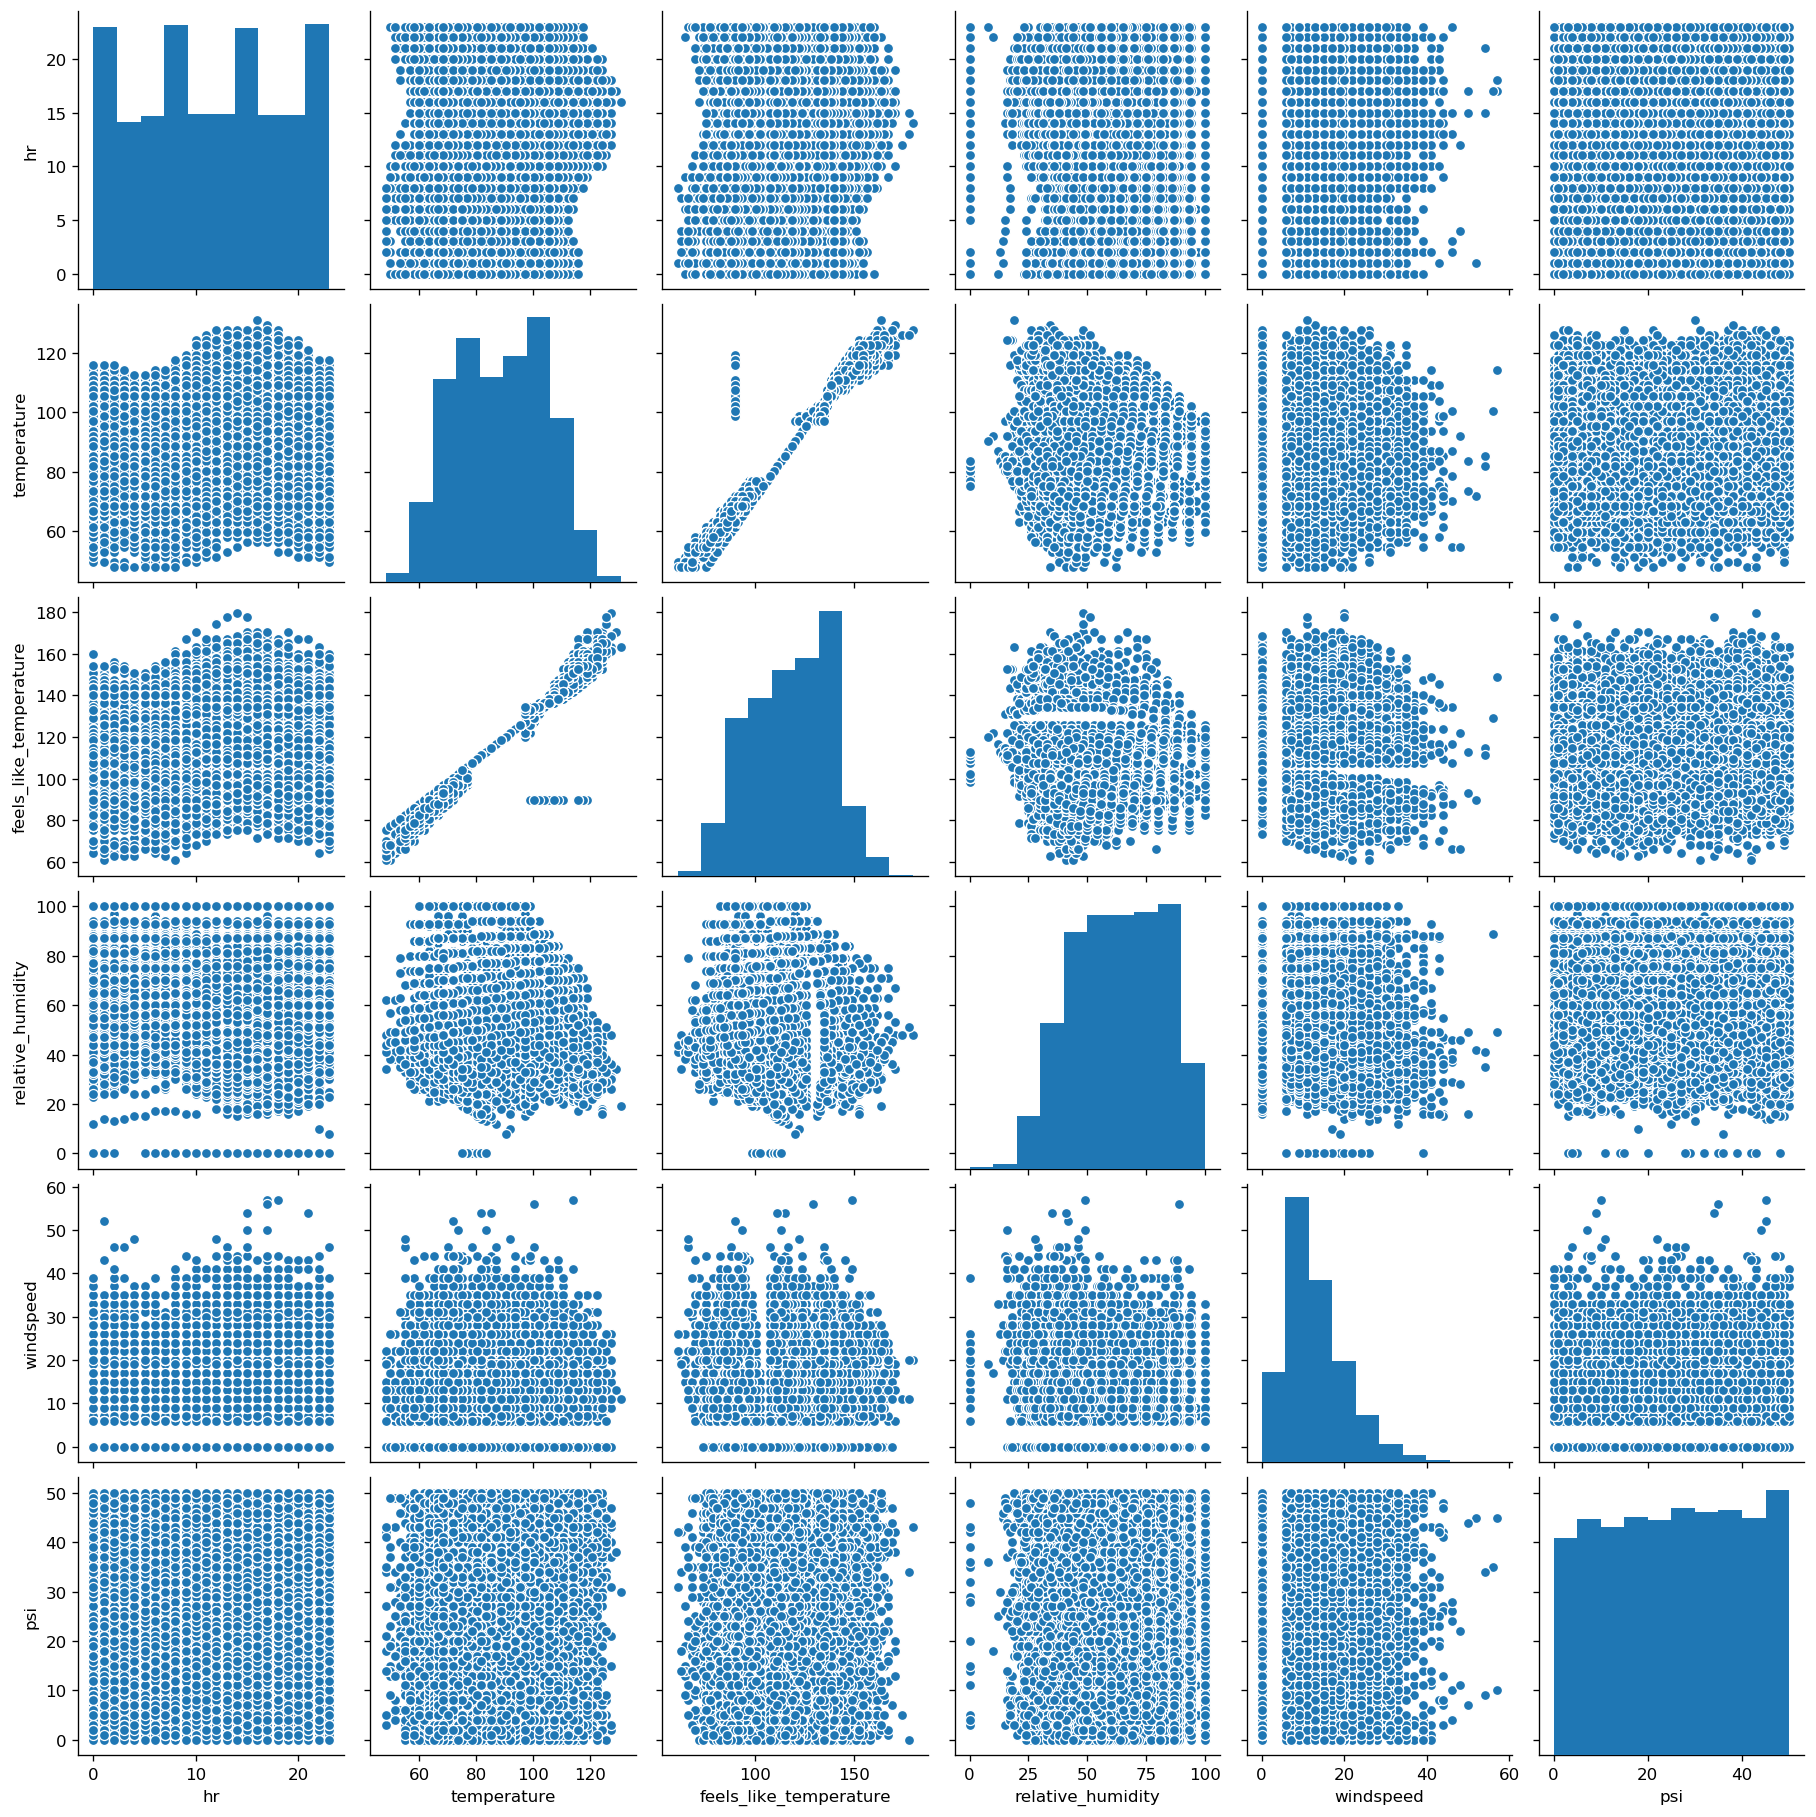

In [138]:
raw_df.drop(columns=['guest_scooter', 'registered_scooter']).pipe(sns.pairplot)

Observations

- The predictors `temperature` and `feels_like_temperature` are highly correlated (collinear). If the focus were on significance testing and intepretibility, a data scientist might want to drop 1 of those variables or use dimensionality reduction techniques to combine them. The focus in this exercise, however, is building a prediction pipeline.
- Looking at the correlation plot between `feels_like_temperature` and `temperature`, there is a horizontal line of points which deviate from the mostly linear relationship. Let's investigate this further in part 3.
- Based on the histograms, there does not seem to be any obvious anomalous points in the `temperature` variable, as suspected above. Plotting a histogram confirms this:

Text(0, 0.5, 'Frequency')

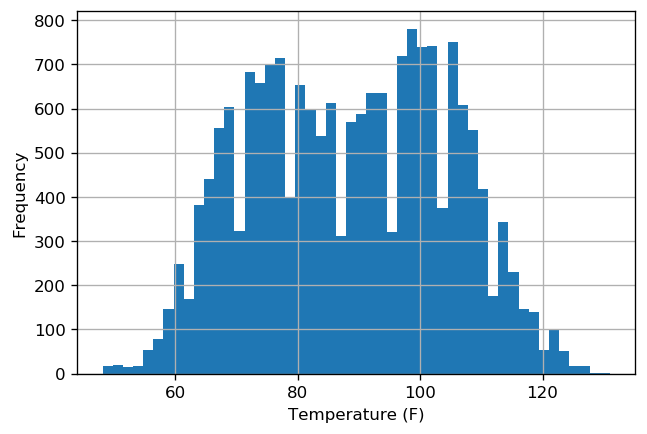

In [139]:
fig, ax = plt.subplots(1,1)
raw_df.temperature.hist(ax=ax, bins=50)
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Frequency")

## 3. Clean

In [140]:
df = raw_df.copy()

#### Drop duplicate values

In [141]:
df = df.drop_duplicates(['date', 'hr'])

#### Correct typos in `weather`

In [142]:
weather_counts_df

weather  count
0             CLEAR    318
1            CLOUDY    126
2   LIGHT SNOW/RAIN     48
3              clar     99
4             clear  11627
5            cloudy   4613
6             cludy     32
7   heavy snow/rain      3
8              lear    233
9   light snow/rain   1455
10   liht snow/rain     15
11            loudy     74

In [143]:
## regex search strings to replace with values

pairs_list = [(r"\w*l\w+r$", "clear"),
              (r"\w*l\w+dy$", "cloudy"),
              (r"\w*l\w+t snow.*", "light snow/rain")]

In [144]:
to_replace, value = list(zip(*pairs_list))


## make function to create a weather_corrected column

def correct_weather(df):
    return df.assign(weather_corrected = lambda x: x.weather.str.lower().\
                                                      replace(to_replace=to_replace, value=value, regex=True))

## check if function works

weather_counts_df.pipe(correct_weather)

weather  count weather_corrected
0             CLEAR    318             clear
1            CLOUDY    126            cloudy
2   LIGHT SNOW/RAIN     48   light snow/rain
3              clar     99             clear
4             clear  11627             clear
5            cloudy   4613            cloudy
6             cludy     32            cloudy
7   heavy snow/rain      3   heavy snow/rain
8              lear    233             clear
9   light snow/rain   1455   light snow/rain
10   liht snow/rain     15   light snow/rain
11            loudy     74            cloudy

In [145]:
# Ascertain that the weather categories are indeed corrected :

df = df.pipe(correct_weather)

df.groupby("weather_corrected").size()

weather_corrected
clear              11195
cloudy              4443
heavy snow/rain        3
light snow/rain     1390
dtype: int64

#### Negative scooter counts

In [146]:
negative_mask = (df.guest_scooter < 0) | (df.registered_scooter < 0)

df.loc[negative_mask]

date  hr weather  temperature  feels_like_temperature  \
6      2011-01-01   5  cloudy         66.7                    91.4   
33     2011-01-02   7  cloudy         80.2                   109.4   
48     2011-01-02  22   clear         66.7                    86.0   
52     2011-01-03   4   clear         59.9                    77.0   
53     2011-01-03   5   clear         59.9                    77.0   
...           ...  ..     ...          ...                     ...   
18565  2012-12-29   4  cloudy         66.7                    89.6   
18587  2012-12-29  23  cloudy         68.4                    89.6   
18589  2012-12-30   2  cloudy         68.4                    89.6   
18592  2012-12-30   4  cloudy         68.4                    91.4   
18593  2012-12-30   5  cloudy         68.4                    87.8   

       relative_humidity  windspeed  psi  guest_scooter  registered_scooter  \
6                   75.0        6.0   35             -1                  11   
33                  76.0       13.0   42             -2                  10   
48                  44.0       20.0   36             -2                  61   
52                  47.0       26.0   27             -2                  10   
53                  47.0       19.0   32             -2                  21   
...                  ...        ...  ...            ...                 ...   
18565               75.0        6.0    5             -1                  20   
18587               60.0        0.0   41             -2                 228   
18589               56.0       19.0   48             -2                 137   
18592               56.0       15.0   33             -2                  53   
18593               48.0       20.0   38             -2                  19   

      weather_corrected  
6                cloudy  
33               cloudy  
48                clear  
52                clear  
53                clear  
...                 ...  
18565            cloudy  
18587            cloudy  
18589            cloudy  
18592            cloudy  
18593            cloudy  

[602 rows x 11 columns]

These entries may represent data collection errors. Let's drop these entries as the errors are found in the response variables, which may lead the machine learning algorithm to learn "wrongly".

In [147]:
df = df.loc[~negative_mask]

#### Potential temperature measurement error

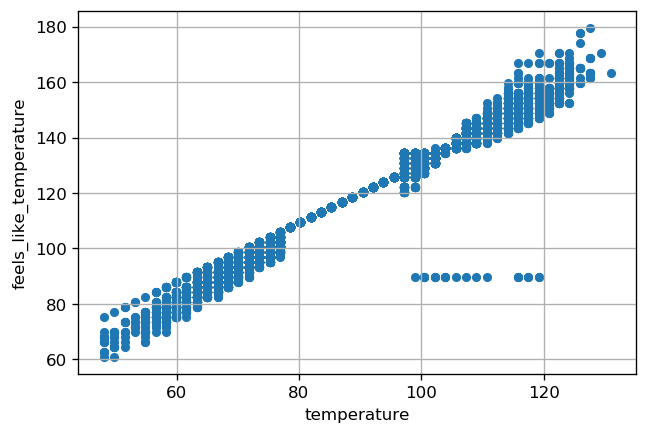

In [148]:
fig, ax= plt.subplots(1,1)

df.plot.scatter(x='temperature', y='feels_like_temperature', ax=ax)
ax.grid()

- Further inspection of the correlation plot indicates that there are some quirks at `feels_like_temperature` = 89.6 (horizontal line on plot)
- This may be indicative of some kind of systematic error
- Since there are only 23 such points, dropping them probably will not affect the final outcome
- To identify the points to drop we compute the absolute difference between the `feels_like_temperature` and `temperature` z-scores

In [149]:
def get_z_score(df, col):
    df_new = df.copy()
    df_new[col+"_z_score"] = (df[col] - df[col].mean())/ df[col].std()
    return df_new

df = df.pipe(get_z_score, "temperature").\
     pipe(get_z_score, "feels_like_temperature").\
     assign(z_score_diff_abs = lambda x: (x.temperature_z_score - x.feels_like_temperature_z_score).abs())

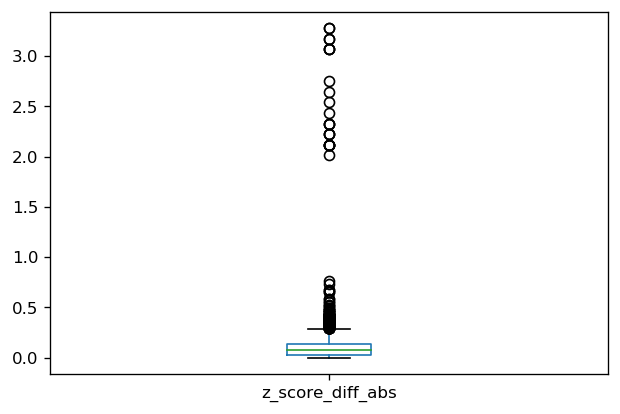

In [150]:
df.z_score_diff_abs.plot.box()

Inspecting the boxplot above allows us to discern a group of outliers with `z_score_diff_abs` > 1.5 . Hence, we set our threshold at this default. This threshold can be modified in the `config.yaml` file.

In [151]:
z_threshold = 1.5

In [152]:
df['above_threshold'] = df['z_score_diff_abs'] > z_threshold

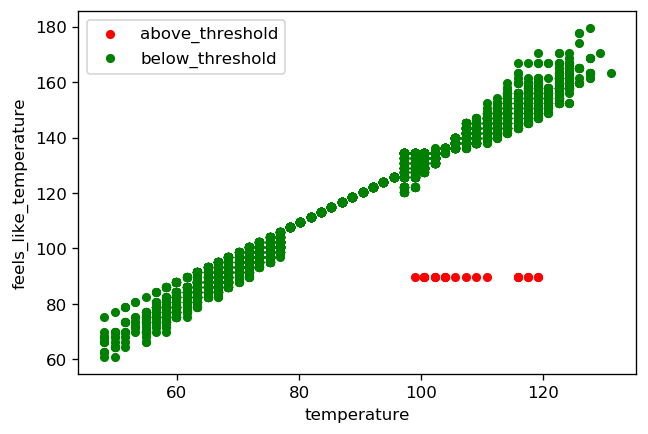

In [153]:
fig, ax = plt.subplots(1,1)

df.query("above_threshold").plot.scatter(x='temperature', y='feels_like_temperature', label="above_threshold", ax=ax, color="red")
df.query("not above_threshold").plot.scatter(x='temperature', y='feels_like_temperature', label="below_threshold", ax=ax, color="green")

As seen above, this method helps to isolate the anomalous points. We drop the entries above the threshold.

In [154]:
df = df.query("not above_threshold")

#### Create `total_scooter` column

This is the variable to be predicted

In [155]:
df["total_scooter"] = df["guest_scooter"] + df["registered_scooter"]

### 4. Create features

The objective of this section is to gain insights on the data and act on those insights by creating meaningful features. To avoid uncovering patterns in the validation/ test set, which will undermine the evaluation metrics, the following section will use only the training set for exploration.

#### Extract training set

In [159]:
train_df, _, = mlp.setup.split(df)

train_df.shape

(11484, 16)

In [160]:
unwanted_cols = ["weather", "temperature_z_score", "feels_like_temperature_z_score","z_score_diff_abs", "above_threshold"]

train_df = train_df.drop(columns = unwanted_cols)
train_df.shape

(11484, 11)

#### Visualize training set to gain insight

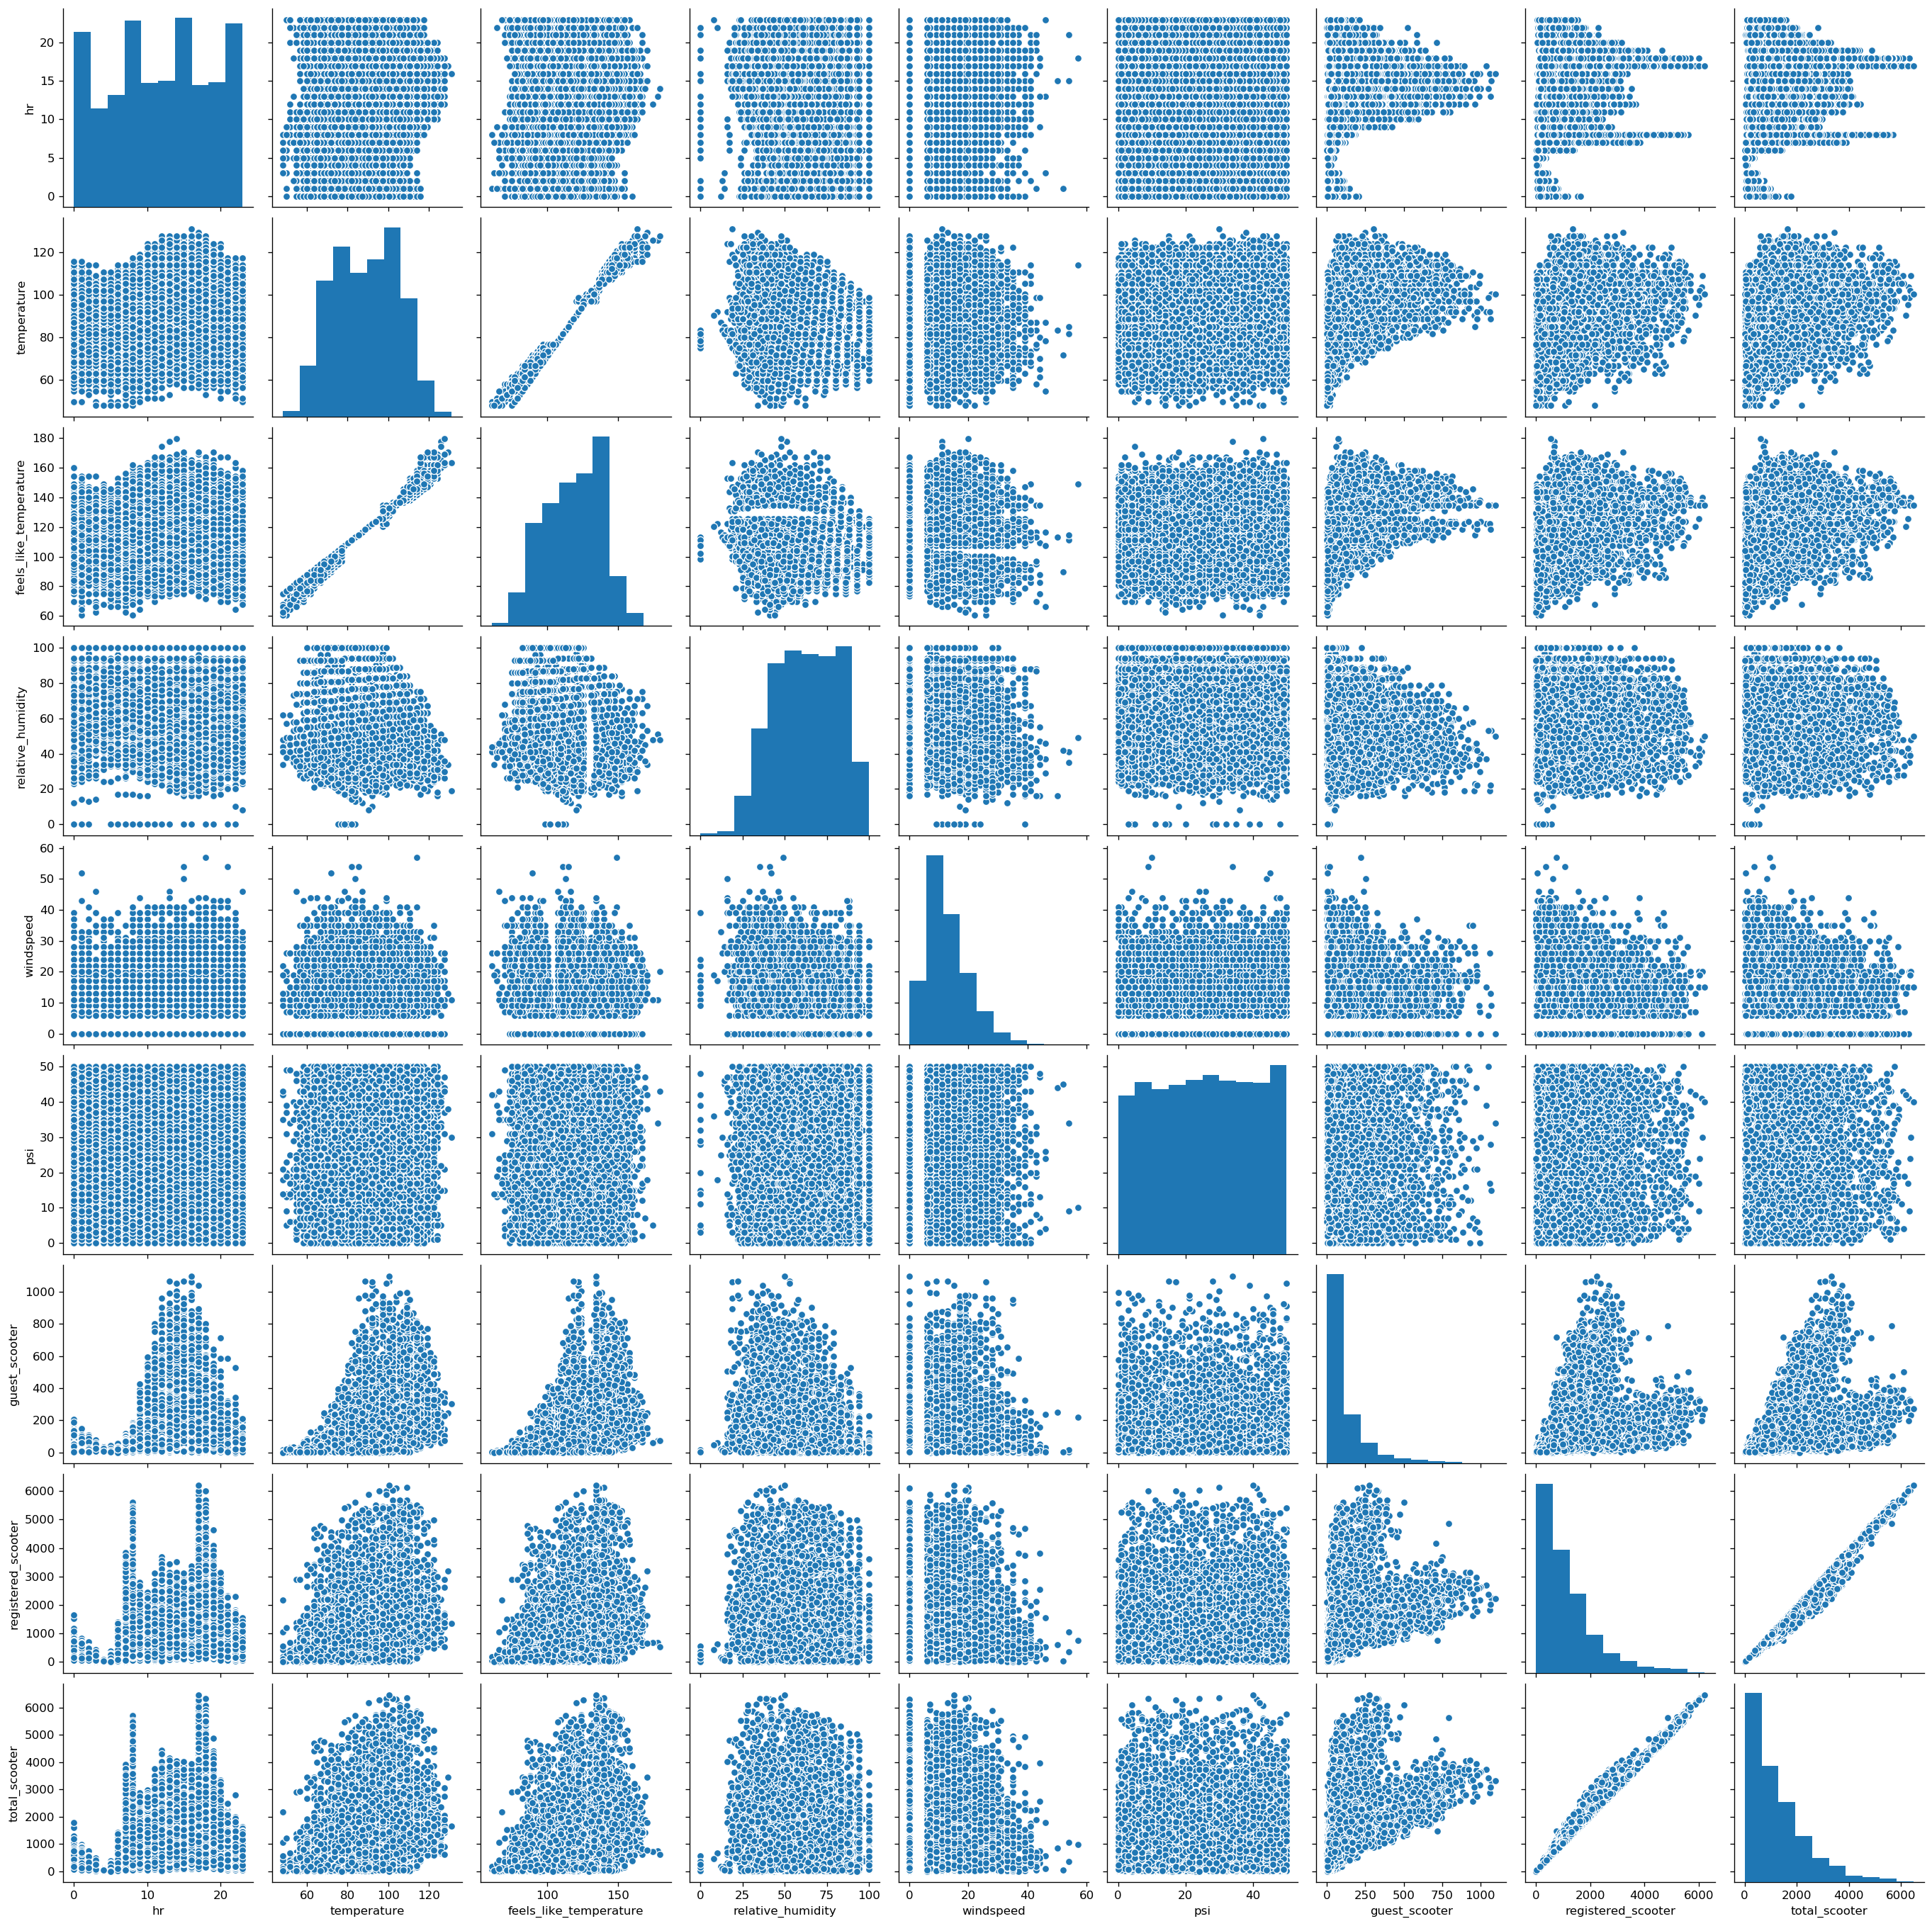

In [72]:
sns.pairplot(train_df)

In [73]:
train_df.corr().style.background_gradient(cmap="RdYlGn")

Observations
- `total_scooter` has strongest correlations with `hr`, `temperature` and `feels_like_temperature`
- There is a curious "heart-shaped" relationship between `guest_scooter` and `total_scooter`/`registered_scooter`

#### Encode weather as ordinal

There seems to be a natural ordering to the "weather" variable, ranging from clear (least severe) to heavy rain/snow (most severe). Let's encode it as an ordinal. In the full pipeline, the user can configure the values in `config.yaml`.

In [37]:
weather_ord_encoding= {'clear': 0,
                       'cloudy': 1,
                       'light snow/rain': 2,
                       'heavy snow/rain': 3}

In [76]:
weather, ordinal = list(zip(*weather_ord_encoding.items()))

lookup_weather = pd.Series(index=weather,
                           data=ordinal,
                           name="weather_encoded")

In [77]:
train_df = train_df.merge(lookup_weather, left_on="weather_corrected", right_index=True).sort_values(["date", "hr"])

#### Create `datetime` column

In [78]:
## Make datetime column

train_df['datetime'] = pd.to_datetime(train_df.date + ' ' + train_df.hr.astype(str) + ":00")

#### Create date and time related features

Riding scooters is a human activity which is likely to be influenced by factors such as the type of day (business day or not), month of the year, and daylight hours. These may seem obvious to us, but is hard for the machine learning algorithm to infer purely from the data procided. Hence, we need to give it a bit of "help" by creating some extra features.

##### Weekends

In [79]:
train_df.groupby(train_df.datetime.dt.day_name())['total_scooter'].mean().sort_values()

datetime
Sunday       1025.258950
Saturday     1121.414505
Monday       1219.377267
Friday       1253.808948
Wednesday    1305.357009
Thursday     1305.572405
Tuesday      1317.402516
Name: total_scooter, dtype: float64

As we an see, scooter activity is least heavy on Sundays and Saturdays. Hence, we create indicator variables for weekends, based on the day of the week. If we had more specific information about the location of this city, we could combine it with regional holidays to create a "business days" variable.

In [80]:
train_df['is_weekend'] = train_df.datetime.dt.dayofweek.isin([5,6])

- Although this doesn't directly help with the goal of predicting `total_scooter`, creating this variable helps explain the "heart-shaped" correlation between `registered_scooter` and `guest_scooter` – the correlation between those variables depends on the type of day. One might conclude that rental e-scooters are used more heavily on weekend.

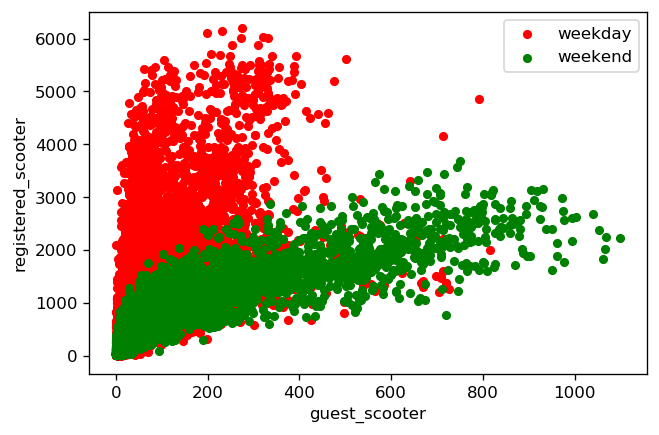

In [81]:
fig, ax = plt.subplots(1,1)

train_df[lambda x: x.is_weekend==False].plot.scatter(x="guest_scooter", y="registered_scooter", ax=ax, c="red", label="weekday")
train_df[lambda x: x.is_weekend==True].plot.scatter(x="guest_scooter", y="registered_scooter", ax=ax, c="green", label="weekend")

##### Month of year

In [82]:
train_df['month'] = train_df.datetime.dt.month

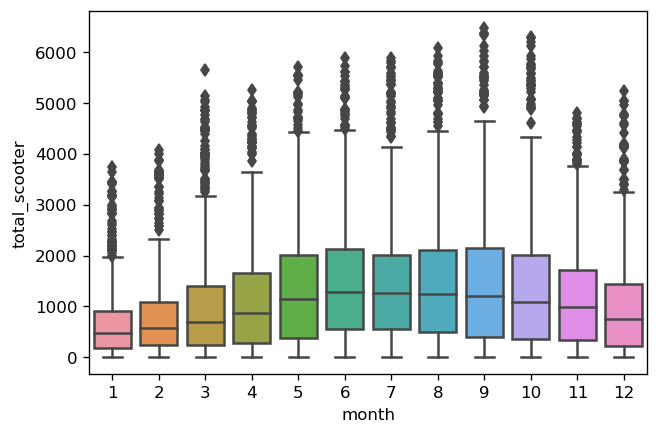

In [83]:
sns.boxplot(x='month', y='total_scooter', data= train_df)

As we can see, more scooter journeys are made in the warmer months. We should create a `months` variable to reflect this.

##### Time of day

In [84]:
train_df.groupby(['month', 'hr'])['registered_scooter'].mean().unstack().T.style.background_gradient(cmap="RdYlGn")

From the heat map above, is is clear that we need to create a `is_rush_hour` column to explain the peaks at 8, 17, and 18 hours. These can be configured in the `config.yaml` file

In [85]:
rush_hours = [8, 17, 18]

In [86]:
train_df['is_rush_hour'] = train_df.hr.isin(rush_hours)

#### Encode cyclic variables as 2-valued cartesian coordinate

We do not want the machine learning algorithm to treat hours "0" and "23" as values from opposite ends of the spectrum when they are in fact neighours. Hence we encode them as an $(x,y)$ tuple. We can think of this coordinate as the location of the hour hand on the face of a clock.

In [114]:
def encode_cyclic(train_df, var, period):
    train_df_new = train_df.copy()
    train_df_new[ var + "_y"] = np.sin(2*np.pi*train_df[var]/period)
    train_df_new[ var + "_x"] = np.cos(2*np.pi*train_df[var]/period)
    
    return train_df_new

In [115]:
train_df = train_df.pipe(encode_cyclic, "hr", 24)\
       .pipe(encode_cyclic, "month", 12)

As we can see in the plots below, the `hr` and `month` coordinates are now encoded in a way that reflects their cyclic nature. For both the scatter plot below, the color corresponds to the original (linear) values, and the size corresponds to the mean of `total_scooters` for that hour/month

Text(0.5, 1.0, 'Plot of month')

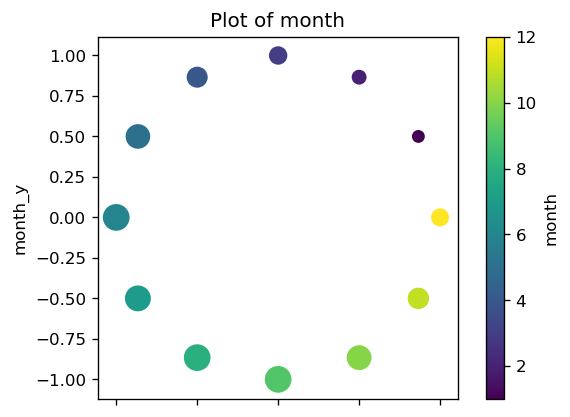

In [116]:
cyclic_month_df = train_df.groupby(['month','month_x', 'month_y'])['total_scooter'].mean().reset_index()
cyclic_month_df.plot.scatter(x="month_x", y="month_y", c='month', s=(cyclic_month_df.total_scooter/100)**2, cmap="viridis")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Plot of month")

Text(0.5, 1.0, 'Plot of hr')

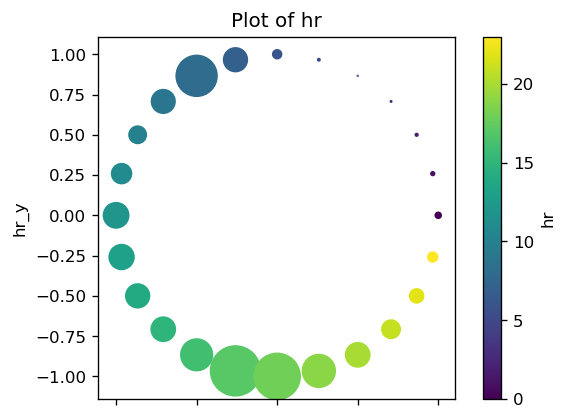

In [117]:
cyclic_hr_df = train_df.groupby(['hr','hr_x', 'hr_y'])['total_scooter'].mean().reset_index()
cyclic_hr_df.plot.scatter(x="hr_x", y="hr_y", c='hr', s=(cyclic_hr_df.total_scooter/100)**2, cmap="viridis")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Plot of hr")

The large points in the `hr` plot represents the rush hours, which will be "explained" by the `is_rush_hour` predictor. We can see that the hourly seasonality is much stronger than the monthly seasonality.

#### Drop redundant columns

In [122]:
train_df_final = train_df.drop(columns = ["hr",
                               "guest_scooter",
                               "registered_scooter",
                               "date",
                               "weather_corrected",
                               "datetime",
                               "month"])